# **Interpolasi Lagrange**


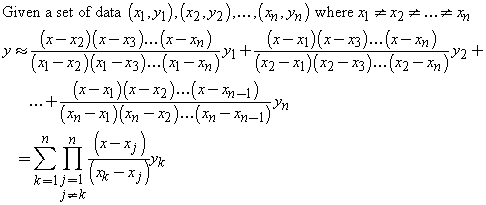

https://www.efunda.com/math/num_interpolation/num_interpolation.cfm

**Contoh** Diketahui fungsi $f(x)=x^2-x+1$ dan data titik untuk $x$ pada interval $[0,2]$. Tentukan nilai pendekatan $f(2.5)$! Hitung eror pendekatan!

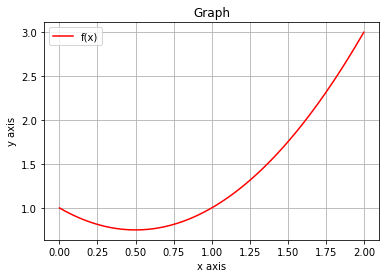

hasil pendekatan =  4.7499999985484465
eror = 1.4515535440295935e-09


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return (x**2-x+1) #input fungsi di sini

def Lag(x,y,xPred):
    n = len(x)
    yPred = 0
    for i in range(n):
        P = np.ones(n)
        for j in range(n):
            if i != j:
                P[i] *= (xPred - x[j])/(x[i] - x[j])
        yPred += y[i]*P[i]
        output = yPred
    return(output)    

#Data
xData = np.linspace(0,2,15)
yData = xData**2-xData +1

#Grafik
func2=np.vectorize(func)

x=np.arange(0,2,0.001)
plt.title("Graph")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(x,func2(x),label='f(x)',color = 'red')
plt.legend()
plt.grid()
plt.show()

print("hasil pendekatan = ",Lag(xData,yData,2.5))
print("eror =",abs(func(2.5)-Lag(xData,yData,2.5)))

**Contoh** Hitunglah nilai pendekatan dari $f(x)$ untuk nilai $x=0.556,0.365$ menggunakan interpolasi lagrange dengan diketahui data berikut :
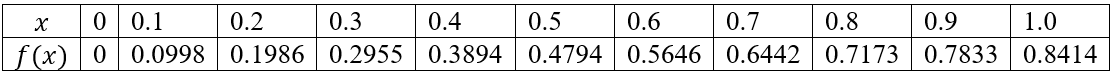

In [ ]:
def lagrange(x,xdata,ydata):
    if len(xdata)!=len(ydata):
        print("Error")
    else:
        n=len(xdata)
        P=0
        for i in range(0,n):
            Lk=1
            for j in range(0,n):
                if i==j:
                    continue
                else:
                    Lk=Lk*(x-xdata[j])/(xdata[i]-xdata[j])
            P=P+ydata[i]*Lk
        return(P)

x1=0.556;x2=0.365
xdata=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ydata=[0,0.0998,0.1986,0.2955,0.3894,0.4794,0.5646,0.6442,0.7173,0.7833,0.8414]
print('Nilai pendekatan f(0.556) = ',lagrange(x1,xdata,ydata))
print('Nilai pendekatan f(0.365) = ',lagrange(x2,xdata,ydata))

Nilai pendekatan f(0.556) =  0.5277549286810398
Nilai pendekatan f(0.365) =  0.35693058313600823


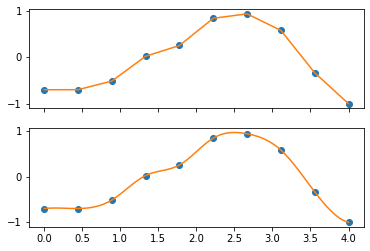

In [ ]:
# Menggunakan library scipy
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

n = 10
x = np.linspace(0, 4, n)
y = np.cos(x**2/3+4)+ 0.1 * np.random.randn(n)

f1 = interp1d(x, y, kind = 'linear')
f2 = interp1d(x, y, kind = 'cubic')

xnew = np.linspace(0, 4, 100)

f, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(x, y, 'o', xnew, f1(xnew), '-')
ax[1].plot(x, y, 'o', xnew, f2(xnew), '-')

# **Interpolasi Beda Terbagi Newton**

(https://medium.com/@sddkal/newtons-divided-difference-method-for-polynomial-interpolation-4bc094ba90d7)

**Contoh**  Diketahui data

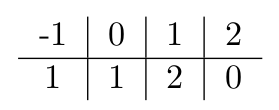

Tentukan nilai pendekatan pada $x=0.5$ ! \\
Langkah : Cari nilai koefisien $b_i$ dengan $i=0,1,2,3$. Kemudian bentuk polinomial berikut 
$$p_n(x)=b_0+b_1(x-x_0)+b_2(x-x_0)(x-x_1)+b_3(x-x_0)(x-x_1)(x-x_2)$$


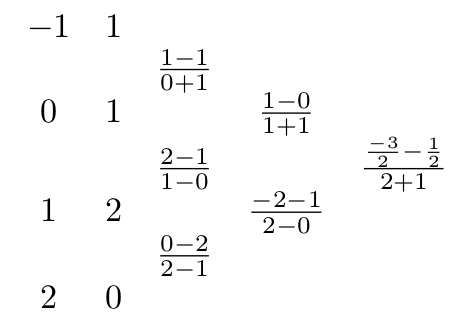

Nilai pendekatan fungsi di x=0.5 adalah  1.625


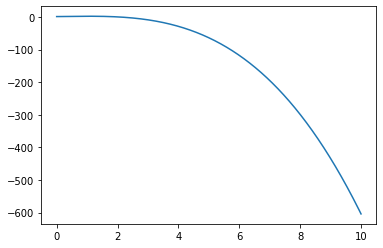

In [ ]:
import numpy as np

xData = np.array([-1, 0, 1, 2]) # x 
yData = np.array([1, 1, 2, 0]) # f(x)

def Newton(x, y):
    n = np.shape(y)[0]
    mx = np.zeros([n, n])
    mx[::,0] = y #kolom pertama y
    for j in range(1,n):
        for i in range(n-j):
            # buat piramid di matriks mx
            mx[i][j] = (mx[i+1][j-1] - mx[i][j-1]) / (x[i+j] - x[i])
    return mx[0] # return baris pertama

koef_b = Newton(xData, yData)

# Membuat polinomial
pol = np.polynomial.Polynomial([0.]) 
n = koef_b.shape[0] # banyak koefisien
for i in range(n):
  p = np.polynomial.Polynomial([1.]) 
  for j in range(i):
    p_temp = np.polynomial.Polynomial([-xData[j], 1.]) # (x - x_j)
    p = np.polymul(p, p_temp) # perkalian (x-x_j)
  p *= koef_b[i] # kalikan dengan koefisien b
  pol = np.polyadd(pol, p) # tambahkan dengan polinomial sebelumnya
p = np.flip(pol[0].coef, axis=0)
print('Nilai pendekatan fungsi di x=0.5 adalah ', np.polyval(p,0.5))

import matplotlib.pyplot as plt
x_axis = np.linspace(0, 10, num=5000)
y_axis = np.polyval(p, x_axis)

plt.plot(x_axis, y_axis)
plt.show()

# **Latihan**

Diberikan fungsi $f(x)=1/(1+x^2)$, $-1\leq x\leq 2$. Buat $p_3 {(x)}$ dengan menggunakan $4$ titik. Hitung nilai pendekatan $f(x)$ untuk nilai $x$ yang besar! 
 